# Pytorch Test Youtube Introduction
Notebook for following along with the Pytorch introduction, using [Pytorch](https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html) website tutorial. This notebook will be similar to the previous Pytorch Test notebooks, as the [youtube content](https://youtu.be/IC0_FRiX-sw?t=231) covers similiar works.

### Choices for data

<br>

### Libaries and Modules
Importing the necessary libaries and modules for the notebook.

In [1]:
#Import cell
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import pickle as pk
import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
import torchvision.transforms as transforms

print("Imports complete")

Imports complete


<br>

### Importing data sets
Importing the data for the models.

<b>Import sample data set and corresponding time/geo data</b>

In [2]:
#Importing data sets

print("Data sets successfully imported.")

Data sets successfully imported.


In [3]:
#Imported definitions
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

print("Imported datasets and libaries defined.")

Imported datasets and libaries defined.


<br>

### Class Definitions
<b>Classes:</b><br>
<ul>
<li>
</ul>

In [4]:
#Class definition cell

print("Classes defined.")

Classes defined.


<br>

### Calculation functions
<b>Functions:</b><br>
<ul>
<li>
</ul>

In [5]:
#Calculation functions cell


print("Calculation functions defined.")

Calculation functions defined.


<br>

### Plotting functions
<b>Functions:</b>
<ul>
<li> 
</ul>

In [6]:
#Plotting functions Cell


print("Plotting functions defined.")

Plotting functions defined.


<br>

### Main code

#### Tensors

In [7]:
z = torch.zeros(5,3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [8]:
i = torch.ones((5,3), dtype=torch.int16)
print(i)
print(i.dtype)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
torch.int16


Often it is useful to initialize learning weights randomly, often with a specific seed for the PRNG for repeatability.

In [9]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print(f"A random tensor:\n{r1}\n")

r2 = torch.rand(2, 2)
print(f"A different random tensor:\n{r2}\n")

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print(f"A new tensor which should match r1:\n{r3}\n")

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

A new tensor which should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])



Arithmetic operations are performed intuitively. Operations with scalars are performed across the entire tensor.

In [10]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3)*2
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
print("Running r1 + r2 will create a run time error")

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])
Running r1 + r2 will create a run time error


In [11]:
r = (torch.rand(2, 2) - 0.5)*2 #values between -1 and 1
print(f"A random matrix, r:\n{r}\n")

print(f"Absolute value of r:\n{torch.abs(r)}\n")
print(f"Inverse sine of r:\n{torch.asin(r)}\n")
print(f"Determinant of r:{torch.det(r)}\n")
print(f"Singular value decomposition of r:\n{torch.svd(r)}\n")
print(f"Average and standard deviation of r:\n{torch.std_mean(r)}\n")
print(f"Maximum value of r:{torch.max(r)}")

A random matrix, r:
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

Absolute value of r:
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

Inverse sine of r:
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])

Determinant of r:-0.5703388452529907

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([1.1793, 0.4836]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))

Average and standard deviation of r:
(tensor(0.7217), tensor(0.1247))

Maximum value of r:0.9956492185592651


#### AutoGrad

In [12]:
x = torch.randn(1, 10) #input
prev_h = torch.randn(1, 20) #hidden state of the rnn
W_h = torch.randn(20, 20) #learning weights
W_x = torch.randn(20, 10) #learning weights

i2h = torch.mm(W_x, x.t())
h2h = torch.mm(W_h, prev_h.t())
next_h = i2h + h2h
next_h = next_h.tanh() #activation function

loss = next_h.sum() #difference between prediction and actual results
#loss.backward() #gradient calculation

#### Building Models

In [13]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16*6*6, 120) #6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        return None
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        #max pooling over (2, 2) window, can use one number if square size
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] #all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


The model class code is placed here for natural flow along side the video, however in normal notebooks this will be found in the [Class definitions](#Class-Definitions) section. Before the model can be run, it needs to be instantiated, as shown below.

In [14]:
net = LeNet()
print(f"{net}\n")

input = torch.rand(1, 1, 32, 32) #represents a 32x32 black/white image
print(f"Image batch shape:{input.shape}\n")

output = net(input) #don't call forward() directly
print(f"Raw output:\n{output}\n")
print(f"Raw output shape: {output.shape}")

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:torch.Size([1, 1, 32, 32])

Raw output:
tensor([[ 0.0585, -0.0782, -0.0944, -0.1076, -0.0573, -0.0538, -0.0457,  0.0606,
         -0.0835,  0.0716]], grad_fn=<AddmmBackward0>)

Raw output shape: torch.Size([1, 10])


#### Datasets and Dataloaders
In the [Importing data sets](#Importing-data-sets) section two transforms are defined. 
<ul>
<li> transforms.ToTensor() converts images loaded by Pillow into PyTorch tensors.
<li> transforms.Normalize() adjusts the values of the tensor so their average is 0 and s.d is 0.5. Most activations functions have their strongest gradients around x = 0, so centering the data can speed learning.
</ul>
<br>
To demonstrate an instance of the CIFAR10 dataset will be used. This is a set of 32x32 color image tiles representing 10 classes of objects: 6 animals and 4 vehicles. To download the data, set `download=True`.

In [15]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


In [16]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img/2 + 0.5 #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    return None

 frog  deer  ship   cat


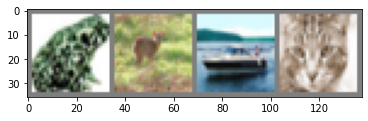

In [17]:
dataiter = iter(trainloader) #get random training images
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(" ".join('%5s' % classes[labels[j]] for j in range(4)))

#### Training Pytorch Model
This section will use the trainset and trainloader from the [section above](#Datasets-and-Dataloaders), as well as other functions. The Net class used is a variant of the LeNeet class adpated for 3 colour images. 

For clarity the instance here will be called net2 to avoid confusion with net in the [Building Models](#Building-Models) section.

In [18]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

Files already downloaded and verified


In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        return None
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

With the class defined, it needs instatiated, as well as having a loss function and optimizer defined. Here stochastic gradient descent is used.

In [20]:
net2 = Net()
criterion = nn.CrossEntropyLoss() #Loss function
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9) #Optimizer

This all comes together to be run in a training loop.

In [21]:
for epoch in range(2): #loop over the data set for each epoch
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data #get inputs
        optimizer.zero_grad() #zero parameter gradients
        
        outputs = net2(inputs) #forwards
        loss = criterion(outputs, labels) #loss calculation
        loss.backward() #backwards
        optimizer.step() #optimize
        
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch+1, i+1, running_loss/2000))
            running_loss = 0
            
print("Finished Training")

[1,  2000] loss: 2.166
[1,  4000] loss: 1.840
[1,  6000] loss: 1.683
[1,  8000] loss: 1.574
[1, 10000] loss: 1.504
[1, 12000] loss: 1.473
[2,  2000] loss: 1.373
[2,  4000] loss: 1.335
[2,  6000] loss: 1.327
[2,  8000] loss: 1.293
[2, 10000] loss: 1.271
[2, 12000] loss: 1.272
Finished Training


A check should now occur to ensure that the model is doing general learning and not "memorizing" the dataset (overfitting). This would be a sign of too small a dataset, or that the model has more learning parameters than it needs to correctly model the dataset.

In [23]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net2(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print("Accuract of the netowrk on the 10000 test images: %d %%" %
      (100*correct/total))

Accuract of the netowrk on the 10000 test images: 55 %


<br>